#                                              Microsoft Movie Studio EDA

<div style="text-align:center"><img src = "./images/microsoft_studios.jpg" position = 'center' width = "300" height="150" /></div>

**Author:** MAUREEN KITANG'A

## Project Overview 

Following the creation of the new Microsoft Movie Studio, I have been charged with exploring 
what types of films are currently performing best at the box office. After utilizing the EDA process ,
the analysis identified the following:
  * The best month to release a movie is February.
  * The most-selling genre is Animation followed closely by Sci-Fi.
  * The best three directors are John Andreas Andersen , Robin Pront, David Delhoffen.


## Business Problem

Microsoft has decided to venture in to the film industry by launching a new movie studio: **Microsoft Movie Studio**.
However, they are not sure where to start , because they don't have enough knowledge about the film industry.
I have been tasked with aiding the new head of Microsoft to study which films  are showing the best results at the box office, and translate my findings into actionable insights. There are many aspects that affect profitability of such an industry. 

I based my analysis on the following factors:
 * Total gross earnings
 * Genre
 * Release Date
 * Rating
 * Runtime
 * Directors
 * Studios(Competitors)


## Data Understanding

I used three datasets from renowned film database websites: [Box Mojo](https://www.boxofficemojo.com/), [IMBD](https://www.imdb.com/) and [TMBD](https://www.themoviedb.org/)
 
Such data primarily comes from the years 2010-2019.

In [1]:
#import necessary libraries for data analysis
import pandas as pd
import numpy as np

#import necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Sqlite3 for database management
import sqlite3

## Loading the Data

**Dataset 1 : Box Mojo - Movie Gross**

In [2]:
#Loading the csv file in to a pandas dataframe
bom_movie_gross = pd.read_csv('./data/bom.movie_gross.csv.gz')

#Previewing the first few rows
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#General information and structure of the dataframe
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
"""
The movie_gross dataset has 3387 rows and 5 columns, 
and the columns with missing data are 'studio', 'domestic_gross', and 'foreign gross'.

Datatypes in this DataFrame are object, float, and int.

'foreign_gross' is listed as the datatype object meaning that there is a mix of datatypes both string and float.

"""

"\nThe movie_gross dataset has 3387 rows and 5 columns, \nand the columns with missing data are 'studio', 'domestic_gross', and 'foreign gross'.\n\nDatatypes in this DataFrame are object, float, and int.\n\n'foreign_gross' is listed as the datatype object meaning that there is a mix of datatypes both string and float.\n\n"

In [5]:
#Descriptive statistics for the numerical columns
bom_movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


**Dataset 2 : IMDB**

In [6]:
# Load the imdb data into a DataFrame 
conn = sqlite3.connect('im.db/im.db')

# View the tables within the idmb database 
imdb_tables = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
imdb_tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


The Title basics

In [7]:
# Loading the title_basics data in to a pandas dataframe
title_basics = pd.read_csv('./data/imdb.title.basics.csv.gz')

#Previewing the first few rows of the dataframe
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
#General information and structure of the movie_basics dataframe
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
"""
This dataset contains 6 columns and 146144 rows
The columns that has rows with missing values are original_title, runtime_minutes and genres
"""

'\nThis dataset contains 6 columns and 146144 rows\nThe columns that has rows with missing values are original_title, runtime_minutes and genres\n'

In [10]:
#Dropping the rows with missing values
title_basics = title_basics.dropna()
#preview
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [11]:
#Descriptive statistics for the numerical columns 'start_year' and 'runtime_minutes'
title_basics.describe()

,start_year,runtime_minutes
count,112232.000000,112232.000000
mean,2014.402078,86.261556
std,2.639042,167.896646
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2014.000000,87.000000
75%,2017.000000,99.000000
max,2022.000000,51420.000000


In [12]:
#Finding the number of movies released per year
num_movies_per_year = title_basics.groupby('start_year')['tconst'].count()

# display the resulting dataframe
num_movies_per_year


start_year
2010     9793
2011    10462
2012    11180
2013    12070
2014    12693
2015    12965
2016    13253
2017    13240
2018    12055
2019     4433
2020       81
2021        4
2022        3
Name: tconst, dtype: int64

In [13]:
"""
The number of movies released have increased over the years 2023-2115
Our dataset contains numbers of unreleased in years out of range 2023-2115
"""

'\nThe number of movies released have increased over the years 2023-2115\nOur dataset contains numbers of unreleased in years out of range 2023-2115\n'

In [14]:
#filtering data to remove the years out of range
title_basics = title_basics[title_basics['start_year'] < 2023]

Title Ratings

In [15]:
# loading the movie_ratings data in to a pandas dataframe
title_ratings = pd.read_csv('./data/imdb.title.ratings.csv.gz')

#General information and structure of the dataframe
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [16]:
"""
This dataset has 3 columns and 73856 rows
There are no missing values
"""

'\nThis dataset has 3 columns and 73856 rows\nThere are no missing values\n'

In [17]:
#Deactivating scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

#Descriptive statistics for the numerical columns 'averagerating' and 'numvotes'
title_ratings.describe()


,averagerating,numvotes
count,73856.00000,73856.00000
mean,6.33273,3523.66217
std,1.47498,30294.02297
min,1.00000,5.00000
25%,5.50000,14.00000
50%,6.50000,49.00000
75%,7.40000,282.00000
max,10.00000,1841066.00000


The Directors

In [18]:
q =("""
SELECT *
FROM directors;
""" 
)
# Read the data into a pandas DataFrame
directors_df = pd.read_sql(q, conn)
directors_df.head()


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


The Persons

In [19]:
q =("""
SELECT *
FROM persons;
""" 
)
# Read the data into a pandas DataFrame
persons_df = pd.read_sql(q, conn)
persons_df.head()


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


**Dataset 3: The Movie DB**

In [20]:
#load the file in to a pandas dataframe
tmdb_data = pd.read_csv('./data/tmdb.movies.csv.gz' , index_col=0)

#Previewing the first few rows
tmdb_data.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53300,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70000,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73400,2010-03-26,How to Train Your Dragon,7.70000,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.51500,2010-05-07,Iron Man 2,6.80000,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.00500,1995-11-22,Toy Story,7.90000,10174
4,"[28, 878, 12]",27205,en,Inception,27.92000,2010-07-16,Inception,8.30000,22186


In [21]:
#General information and structure of the dataframe
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [22]:
"""
The dataset has 9 columns and 26517 rows
There are no missing values
"""

'\nThe dataset has 9 columns and 26517 rows\nThere are no missing values\n'

## Data Cleaning and Preparation

Based on the metric of success we are using used to determine the best performing films in the box office, we first need to identify and clean the relevant data that shall be used for analysis

### Preparing the Box Mojo Dataset

In [23]:
#Define a function to convert the 'foreign_gross' column to float datatype
def convert_to_float(df,column_name):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    return df
convert_to_float(bom_movie_gross, 'foreign_gross')

bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [24]:
#Filling in the rows without values in the foreign gross and domestic gross columns with 0
bom_movie_gross['foreign_gross'].fillna(0, inplace = True) 
bom_movie_gross['domestic_gross'].fillna(0, inplace = True) 

bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [25]:
# Dropping the rows with missing values for 'studio' column
bom_movie_gross.dropna(subset=['studio'],inplace=True)


bom_movie_gross.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


### Preparing the  IMDB Title Basics Dataset

In [26]:

title_basics['genres'] = title_basics.genres.apply(lambda x: x.split(','))

title_basics = title_basics.explode('genres') # Normalize the 'genres' column by exploding the list of genres

title_basics.head() 

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,Drama


In [27]:
#Renaming the primary title column
title_basics.rename(columns={'primary_title': 'title'}, inplace=True)
title_basics

,tconst,title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,Drama
...,...,...,...,...,...,...
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.00000,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.00000,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.00000,Drama
146137,tt9916190,Safeguard,Safeguard,2019,90.00000,Thriller


#### Merging the title_basics and title_ratings datasets from IMDB

In [28]:
#Merged data set of bom_movie_gross & movie_basics
basics_ratings = pd.merge(title_basics, title_ratings, on='tconst', how='inner')
#preview of the first few rows
basics_ratings.head()

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,Action,7.00000,77
1,tt0063540,Sunghursh,Sunghursh,2013,175.00000,Crime,7.00000,77
2,tt0063540,Sunghursh,Sunghursh,2013,175.00000,Drama,7.00000,77
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,Biography,7.20000,43
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,Drama,7.20000,43


#### Merge the basics-ratings  & bom movie gross datasets.

In [29]:
#Merged data set of bom_movie_gross & movie_basics
imdb_bom = pd.merge(basics_ratings, bom_movie_gross, on='title', how='inner')
imdb_bom

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.00000,Action,7.10000,15378,Relbig.,1100000.00000,0.00000,2016
1,tt0315642,Wazir,Wazir,2016,103.00000,Crime,7.10000,15378,Relbig.,1100000.00000,0.00000,2016
2,tt0315642,Wazir,Wazir,2016,103.00000,Drama,7.10000,15378,Relbig.,1100000.00000,0.00000,2016
3,tt0337692,On the Road,On the Road,2012,124.00000,Adventure,6.10000,37886,IFC,744000.00000,8000000.00000,2012
4,tt0337692,On the Road,On the Road,2012,124.00000,Drama,6.10000,37886,IFC,744000.00000,8000000.00000,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
6904,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.00000,Drama,5.40000,673,Eros,72000.00000,0.00000,2018
6905,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.00000,Drama,6.40000,322,CL,181000.00000,0.00000,2018
6906,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.00000,Romance,6.40000,322,CL,181000.00000,0.00000,2018
6907,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.00000,Documentary,8.80000,2067,Trafalgar,4200000.00000,16100000.00000,2018


### Preparing the TMDB dataset

In [30]:
#Dropping the genre_ids
tmdb_data.drop(columns = ['genre_ids','id'] , axis=1, inplace = True)
#Previewing the first few rows
tmdb_data.head()

,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,en,Harry Potter and the Deathly Hallows: Part 1,33.53300,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70000,10788
1,en,How to Train Your Dragon,28.73400,2010-03-26,How to Train Your Dragon,7.70000,7610
2,en,Iron Man 2,28.51500,2010-05-07,Iron Man 2,6.80000,12368
3,en,Toy Story,28.00500,1995-11-22,Toy Story,7.90000,10174
4,en,Inception,27.92000,2010-07-16,Inception,8.30000,22186


The Final Dataset
Merging the imdb_bom_dataset with tmdb_data. This final_movie_dataset will be used for the analysis.

In [31]:
#The final dataset
final_movie_dataset = pd.merge(imdb_bom,tmdb_data)
final_movie_dataset

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,original_language,popularity,release_date,vote_average,vote_count
0,tt0337692,On the Road,On the Road,2012,124.00000,Adventure,6.10000,37886,IFC,744000.00000,8000000.00000,2012,en,8.91900,2012-12-21,5.60000,518
1,tt0337692,On the Road,On the Road,2012,124.00000,Drama,6.10000,37886,IFC,744000.00000,8000000.00000,2012,en,8.91900,2012-12-21,5.60000,518
2,tt0337692,On the Road,On the Road,2012,124.00000,Romance,6.10000,37886,IFC,744000.00000,8000000.00000,2012,en,8.91900,2012-12-21,5.60000,518
3,tt4339118,On the Road,On the Road,2014,89.00000,Drama,6.00000,6,IFC,744000.00000,8000000.00000,2012,en,8.91900,2012-12-21,5.60000,518
4,tt5647250,On the Road,On the Road,2016,121.00000,Drama,5.70000,127,IFC,744000.00000,8000000.00000,2012,en,8.91900,2012-12-21,5.60000,518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6542,tt7905466,They Shall Not Grow Old,They Shall Not Grow Old,2018,99.00000,History,8.40000,15612,WB,18000000.00000,0.00000,2018,en,10.44100,2018-12-17,8.10000,123
6543,tt7905466,They Shall Not Grow Old,They Shall Not Grow Old,2018,99.00000,War,8.40000,15612,WB,18000000.00000,0.00000,2018,en,10.44100,2018-12-17,8.10000,123
6544,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.00000,Comedy,4.60000,3618,Par.,31700000.00000,1800000.00000,2018,en,12.27600,2018-11-02,5.90000,96
6545,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.00000,Drama,4.60000,3618,Par.,31700000.00000,1800000.00000,2018,en,12.27600,2018-11-02,5.90000,96


In [32]:
len(final_movie_dataset['title'].unique()) # Identify the number of movie titles in the final_movie_dataset

1984

In [33]:
# Identify the duplicate movie titlesin the dataset
duplicate_movie_titles = final_movie_dataset[final_movie_dataset.duplicated(subset='title')].title.unique()

print(f"{len(duplicate_movie_titles)} duplicate title(s)") 

1768 duplicate title(s)


In [34]:
# Examine the records that belong to the specified set of movies
final_movie_dataset[final_movie_dataset.title.isin(duplicate_movie_titles)]

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,original_language,popularity,release_date,vote_average,vote_count
0,tt0337692,On the Road,On the Road,2012,124.00000,Adventure,6.10000,37886,IFC,744000.00000,8000000.00000,2012,en,8.91900,2012-12-21,5.60000,518
1,tt0337692,On the Road,On the Road,2012,124.00000,Drama,6.10000,37886,IFC,744000.00000,8000000.00000,2012,en,8.91900,2012-12-21,5.60000,518
2,tt0337692,On the Road,On the Road,2012,124.00000,Romance,6.10000,37886,IFC,744000.00000,8000000.00000,2012,en,8.91900,2012-12-21,5.60000,518
3,tt4339118,On the Road,On the Road,2014,89.00000,Drama,6.00000,6,IFC,744000.00000,8000000.00000,2012,en,8.91900,2012-12-21,5.60000,518
4,tt5647250,On the Road,On the Road,2016,121.00000,Drama,5.70000,127,IFC,744000.00000,8000000.00000,2012,en,8.91900,2012-12-21,5.60000,518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6542,tt7905466,They Shall Not Grow Old,They Shall Not Grow Old,2018,99.00000,History,8.40000,15612,WB,18000000.00000,0.00000,2018,en,10.44100,2018-12-17,8.10000,123
6543,tt7905466,They Shall Not Grow Old,They Shall Not Grow Old,2018,99.00000,War,8.40000,15612,WB,18000000.00000,0.00000,2018,en,10.44100,2018-12-17,8.10000,123
6544,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.00000,Comedy,4.60000,3618,Par.,31700000.00000,1800000.00000,2018,en,12.27600,2018-11-02,5.90000,96
6545,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.00000,Drama,4.60000,3618,Par.,31700000.00000,1800000.00000,2018,en,12.27600,2018-11-02,5.90000,96


In [35]:
final_movie_dataset ['worldwide_gross'] = final_movie_dataset['domestic_gross'] + final_movie_dataset['foreign_gross']
final_movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6547 entries, 0 to 6546
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             6547 non-null   object 
 1   title              6547 non-null   object 
 2   original_title     6547 non-null   object 
 3   start_year         6547 non-null   int64  
 4   runtime_minutes    6547 non-null   float64
 5   genres             6547 non-null   object 
 6   averagerating      6547 non-null   float64
 7   numvotes           6547 non-null   int64  
 8   studio             6547 non-null   object 
 9   domestic_gross     6547 non-null   float64
 10  foreign_gross      6547 non-null   float64
 11  year               6547 non-null   int64  
 12  original_language  6547 non-null   object 
 13  popularity         6547 non-null   float64
 14  release_date       6547 non-null   object 
 15  vote_average       6547 non-null   float64
 16  vote_count         6547 

In [36]:
#Dropping duplicate values
final_movie_dataset.drop_duplicates(subset=['title'], keep='last',inplace=True)


In [37]:
#Check the structure of the data
final_movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 4 to 6546
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             1984 non-null   object 
 1   title              1984 non-null   object 
 2   original_title     1984 non-null   object 
 3   start_year         1984 non-null   int64  
 4   runtime_minutes    1984 non-null   float64
 5   genres             1984 non-null   object 
 6   averagerating      1984 non-null   float64
 7   numvotes           1984 non-null   int64  
 8   studio             1984 non-null   object 
 9   domestic_gross     1984 non-null   float64
 10  foreign_gross      1984 non-null   float64
 11  year               1984 non-null   int64  
 12  original_language  1984 non-null   object 
 13  popularity         1984 non-null   float64
 14  release_date       1984 non-null   object 
 15  vote_average       1984 non-null   float64
 16  vote_count         1984 

Now that we no longer have duplicate data, we can start cleaning the DataFrame by dropping columns I won't use for my analysis and organizing the DataFrame. The columns that shall be dropped are: 'original language','vote_count', 'vote_average','start_year','year'

In [38]:
final_movie_dataset.drop(columns=[ 'original_language', 'numvotes', 'vote_count', 'vote_average','start_year','year'], inplace=True)

final_movie_dataset

,tconst,title,original_title,runtime_minutes,genres,averagerating,studio,domestic_gross,foreign_gross,popularity,release_date,worldwide_gross
4,tt5647250,On the Road,On the Road,121.00000,Drama,5.70000,IFC,744000.00000,8000000.00000,8.91900,2012-12-21,8744000.00000
7,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,114.00000,Drama,7.30000,Fox,58200000.00000,129900000.00000,10.74300,2013-12-25,188100000.00000
10,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,114.00000,Drama,6.50000,Uni.,26300000.00000,26900000.00000,19.37300,2014-09-19,53200000.00000
13,tt0369610,Jurassic World,Jurassic World,124.00000,Sci-Fi,7.00000,Uni.,652300000.00000,0.00000,20.70900,2015-06-12,652300000.00000
25,tt3079380,Spy,Spy,119.00000,Crime,7.00000,Fox,110800000.00000,124800000.00000,12.54000,2015-06-05,235600000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
6535,tt7668870,Searching,Searching,102.00000,Thriller,7.70000,SGem,26000000.00000,49400000.00000,23.66000,2018-08-24,75400000.00000
6537,tt7775622,Free Solo,Free Solo,100.00000,Sport,8.20000,NGE,17500000.00000,0.00000,11.47400,2018-08-31,17500000.00000
6540,tt7784604,Hereditary,Hereditary,127.00000,Mystery,7.30000,A24,44100000.00000,35300000.00000,26.18500,2018-06-08,79400000.00000
6543,tt7905466,They Shall Not Grow Old,They Shall Not Grow Old,99.00000,War,8.40000,WB,18000000.00000,0.00000,10.44100,2018-12-17,18000000.00000


In [39]:
#checking for the remaining columns
final_movie_dataset.columns

Index(['tconst', 'title', 'original_title', 'runtime_minutes', 'genres',
       'averagerating', 'studio', 'domestic_gross', 'foreign_gross',
       'popularity', 'release_date', 'worldwide_gross'],
      dtype='object')

## Data Analysis

The analysis phase focuses on exploring the relationships in the previously prepared data to determine. 

**1. Genres**

The genre of the film is the category within which the film is classified. We are going to plot a bar plot to visualize the relationship between the 'genre' and other aspects. 

In [40]:
#Creating another dataframe by making a copy of the final_movie_dataset
genres_analysis_df = final_movie_dataset.copy()

#Identify the unique genres in the dataframe
genres_analysis_df.genres.unique()

array(['Drama', 'Sci-Fi', 'Crime', 'Family', 'Comedy', 'Thriller',
       'Romance', 'History', 'News', 'Fantasy', 'Animation', 'Sport',
       'Horror', 'Music', 'Documentary', 'Mystery', 'War', 'Action',
       'Adventure', 'Western', 'Musical', 'Biography'], dtype=object)

There is both 'Musical' and 'Music' genre which is most probably a mistake. Therefore, I will combine both to make 'Musical'

In [41]:
# Identify the records that belong to the 'Musical' genre an convert them to 'Music' genre
genres_analysis_df.loc[genres_analysis_df['genres'] == 'Music', 'genres'] = 'Musical'

genres_analysis_df.genres.unique() # Check if the unique genres have been updated

array(['Drama', 'Sci-Fi', 'Crime', 'Family', 'Comedy', 'Thriller',
       'Romance', 'History', 'News', 'Fantasy', 'Animation', 'Sport',
       'Horror', 'Musical', 'Documentary', 'Mystery', 'War', 'Action',
       'Adventure', 'Western', 'Biography'], dtype=object)

In [42]:
genres_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 4 to 6546
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           1984 non-null   object 
 1   title            1984 non-null   object 
 2   original_title   1984 non-null   object 
 3   runtime_minutes  1984 non-null   float64
 4   genres           1984 non-null   object 
 5   averagerating    1984 non-null   float64
 6   studio           1984 non-null   object 
 7   domestic_gross   1984 non-null   float64
 8   foreign_gross    1984 non-null   float64
 9   popularity       1984 non-null   float64
 10  release_date     1984 non-null   object 
 11  worldwide_gross  1984 non-null   float64
dtypes: float64(6), object(6)
memory usage: 201.5+ KB


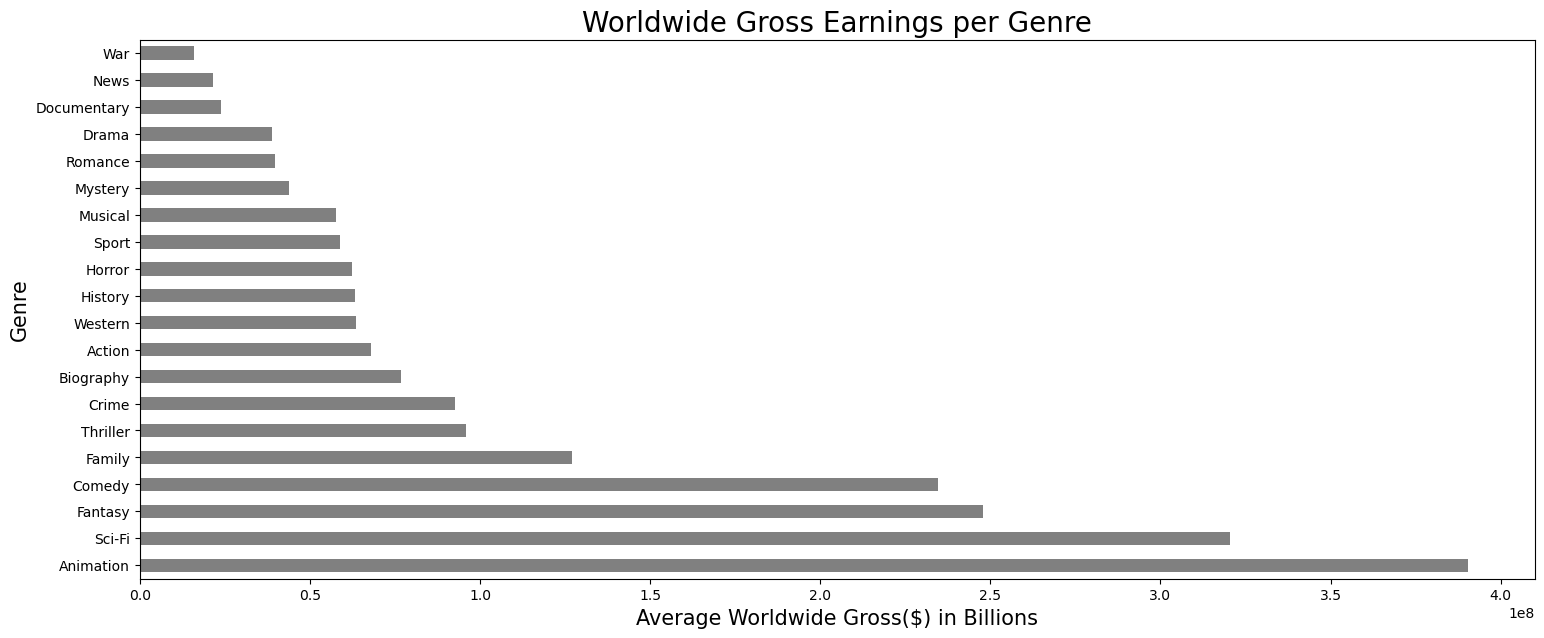

In [48]:
# Plot a bar chart that shows the total revenue generated per genre
fig, ax = plt.subplots(figsize=(18,7))
genres_analysis_df.groupby('genres')['worldwide_gross'].mean().sort_values(ascending=False)[:20].plot(kind='barh', color='grey')
ax.set_ylabel('Genre', fontsize=15)
ax.set_xlabel('Average Worldwide Gross($) in Billions', fontsize=15)
ax.set_title('Worldwide Gross Earnings per Genre', fontsize=20);

We see that Animation, Sci-Fi and Family are the top three in terms of profits. But we need to first understand the number of films released per genre.

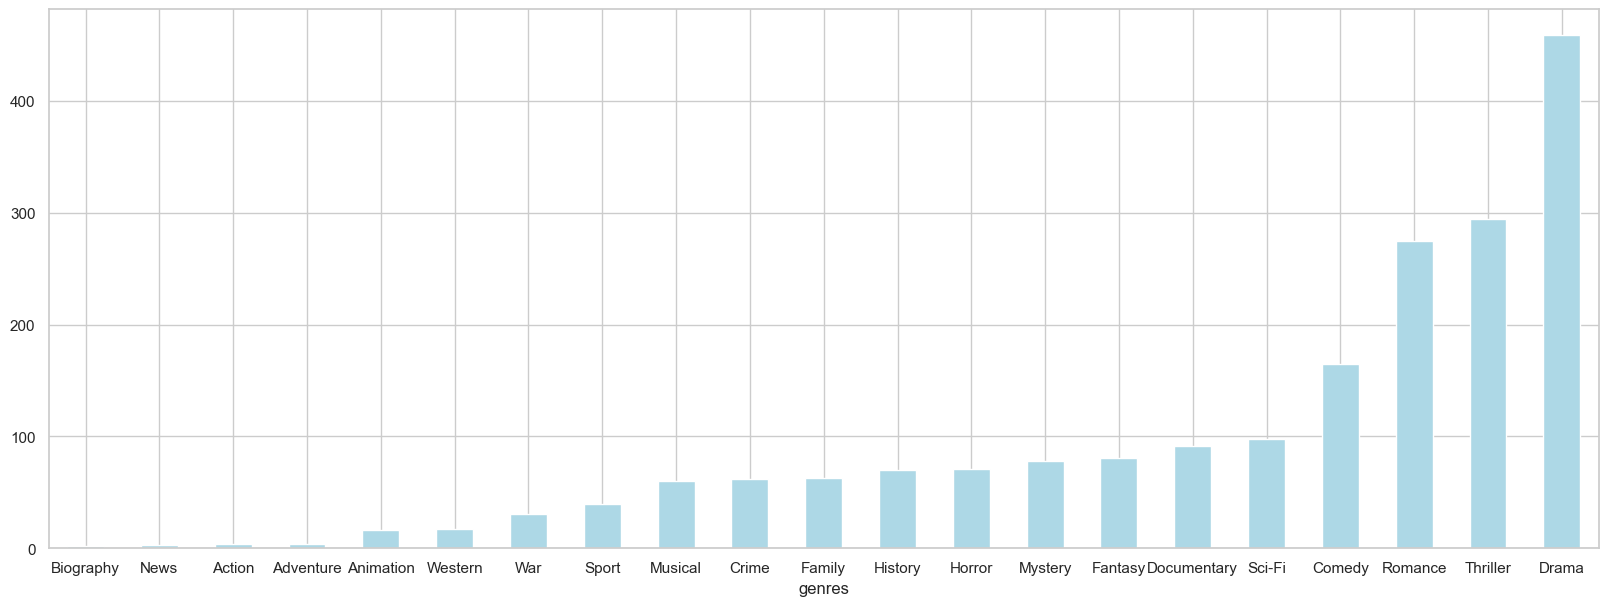

In [ ]:
# Create a plot that counts the number of movies by genre
genres_analysis_df.groupby('genres')['title'].count().sort_values().plot(kind='bar', figsize=(20,7), color='lightblue')

#setting the xlabel, ylabel and the title
ax.set_xlabel('Genre', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Number of Films', fontsize=15)
ax.set_title('Distribution Of Films per Genre', fontsize=20);

From the above plot, we can see that the distribution of the genres of films in the data is not even. Drama and Thriller seem to be making the most films.

**2. Release Date**

The release Date of the film is the exact time that the film was released. I am going to focus on the month the film was released

In [50]:
release_date_df = final_movie_dataset.copy()
# Convert 'release_date' column to datetime format
release_date_df['release_date'] = pd.to_datetime(release_date_df['release_date'])

# Create a new column that contains month names
release_date_df['Month'] = release_date_df['release_date'].dt.strftime('%B')

# Preview of the first few rows
release_date_df.head()

,tconst,title,original_title,runtime_minutes,genres,averagerating,studio,domestic_gross,foreign_gross,popularity,release_date,worldwide_gross,Month
4,tt5647250,On the Road,On the Road,121.00000,Drama,5.70000,IFC,744000.00000,8000000.00000,8.91900,2012-12-21,8744000.00000,December
7,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,114.00000,Drama,7.30000,Fox,58200000.00000,129900000.00000,10.74300,2013-12-25,188100000.00000,December
10,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,114.00000,Drama,6.50000,Uni.,26300000.00000,26900000.00000,19.37300,2014-09-19,53200000.00000,September
13,tt0369610,Jurassic World,Jurassic World,124.00000,Sci-Fi,7.00000,Uni.,652300000.00000,0.00000,20.70900,2015-06-12,652300000.00000,June
25,tt3079380,Spy,Spy,119.00000,Crime,7.00000,Fox,110800000.00000,124800000.00000,12.54000,2015-06-05,235600000.00000,June


Text(0.5, 1.0, 'Worldwide Gross Earnings by Month')

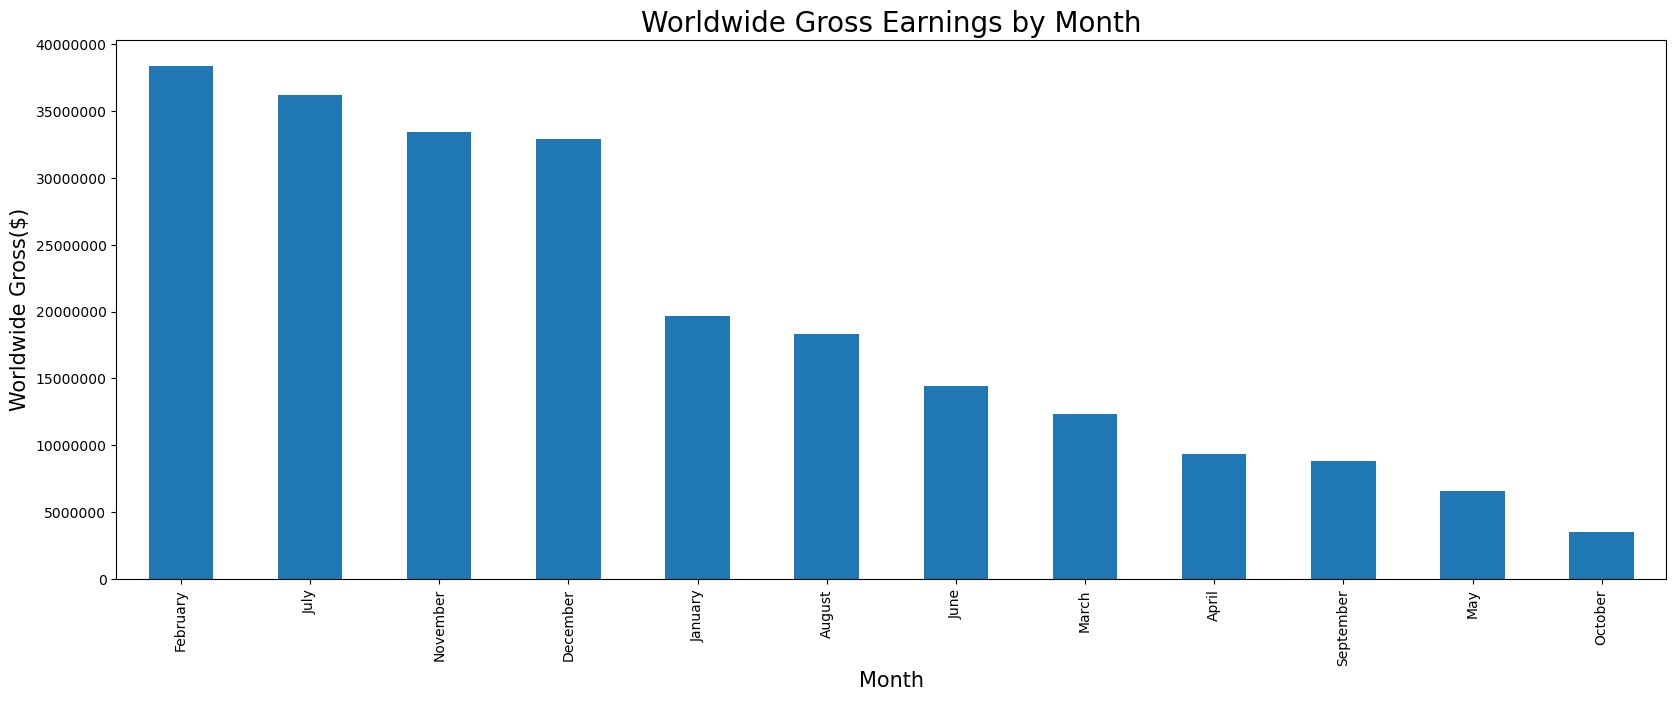

In [51]:
#Create a bar plot to check which month is the most profitable
release_month_plot = release_date_df.groupby('Month')['worldwide_gross'].median().sort_values(ascending=False)
ax = release_month_plot.plot(
     kind='bar',
     figsize=(20,7))
plt.ticklabel_format(style='plain', axis='y')

plt.xlabel("Month", fontsize=15)
plt.ylabel("Worldwide Gross($)", fontsize=15)
plt.title('Worldwide Gross Earnings by Month',fontsize=20)

From the plot above, we can clearly see that February is the most profitable month in the industry. The second one is July followed by November. I am also going to consider how many films are produced each month to determine if number influences monthly earnings.

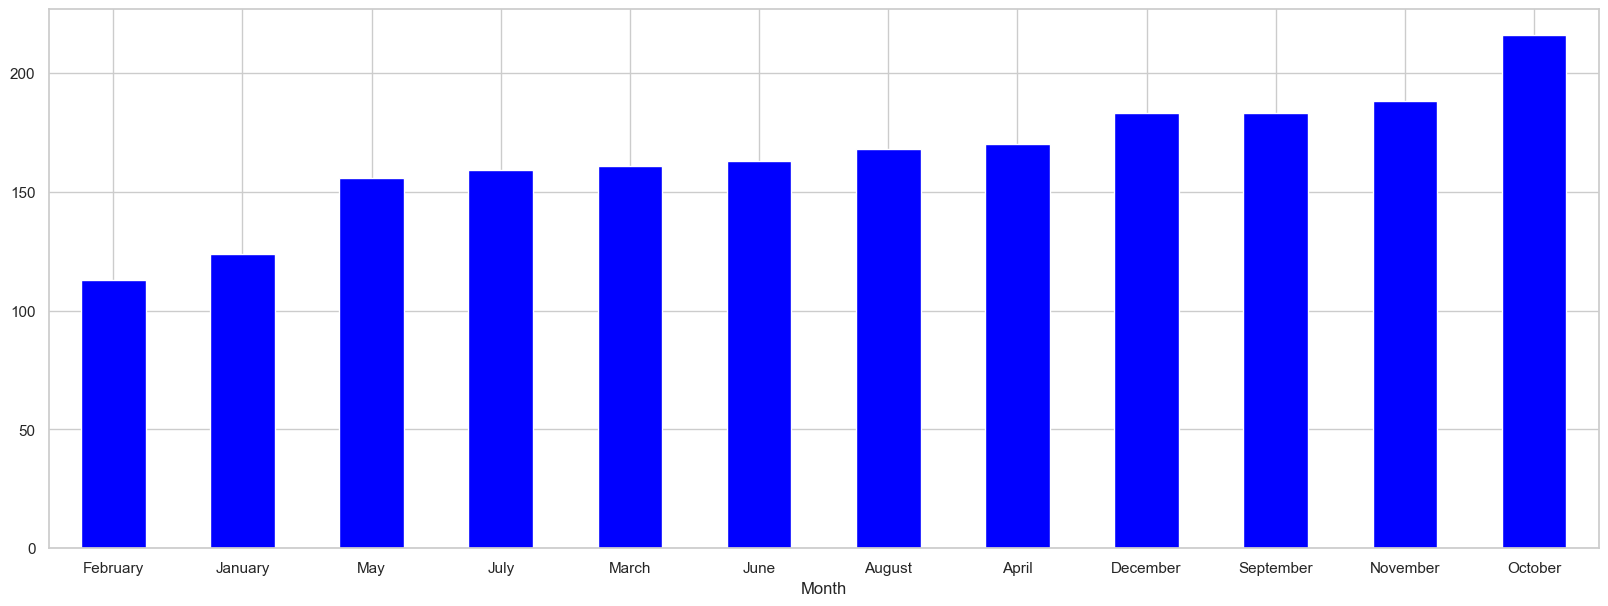

In [ ]:
# Create a plot that counts the number of movies produced each month
release_date_df.groupby('Month')['title'].count().sort_values().plot(kind='bar', figsize=(20,7), color='blue')
ax.set_xlabel('Month')
plt.xticks(rotation=0)
ax.set_ylabel('Number of Films', fontsize=15)
ax.set_title('Distribution Of Films per Month', fontsize=20);

I can conclude that October produces the most films yet has the least revenue. But for november, it seems the number of films released influences the earnings.

**3. Ratings**

The rating of the film is the rank on a scale of 0-10 that the film was given by the people. We are going to use a scatter plot to visualize the relationship between the 'rating' and gross earnings.

In [ ]:
ratings_df = final_movie_dataset.copy()

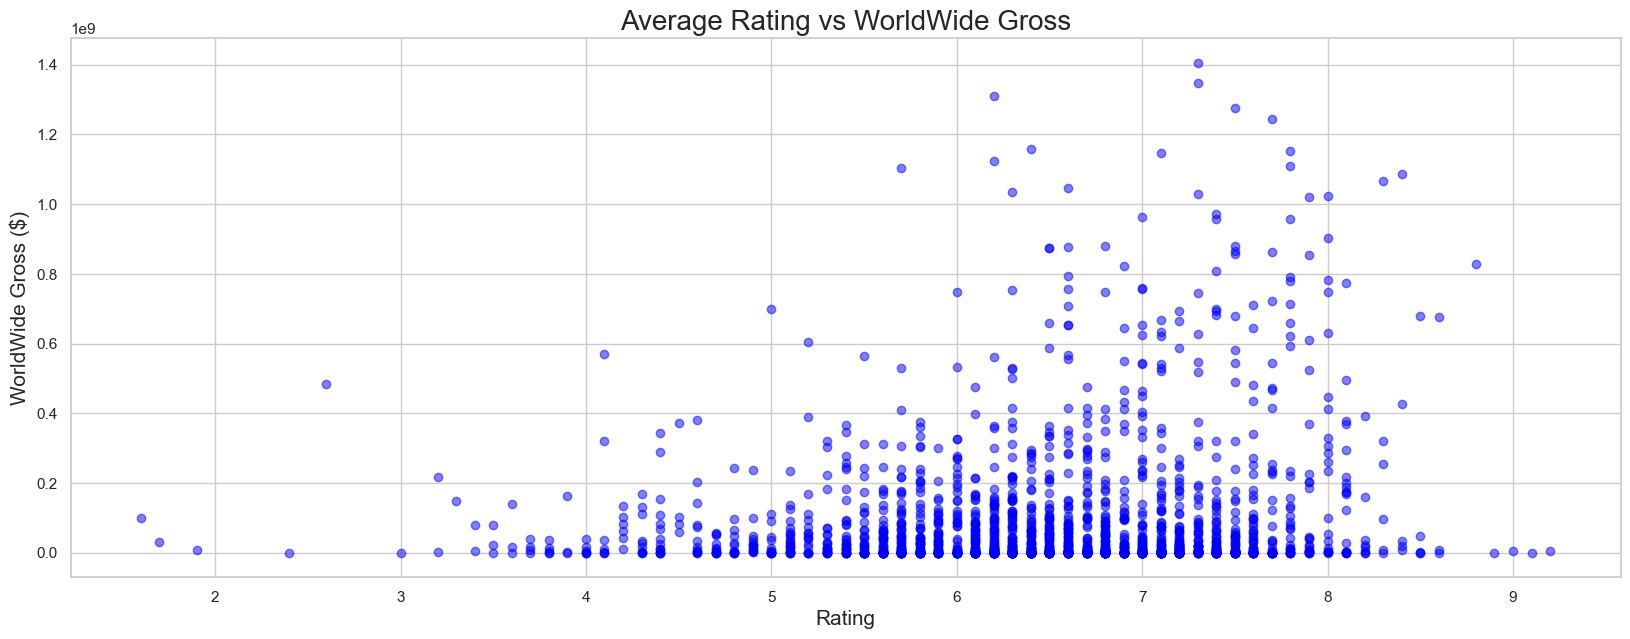

In [ ]:
# Plot a scatter plot that shows the relationship between Worlwide gross and rating 
fig, ax = plt.subplots(figsize=(20,7))

ax.scatter(ratings_df['averagerating'], ratings_df['worldwide_gross'], alpha=0.5, color='blue')
ax.set_xlabel('Rating', fontsize=15)
ax.set_ylabel('WorldWide Gross ($)', fontsize=15)
ax.set_title('Average Rating vs WorldWide Gross', fontsize=20);

Since it is difficult to determine any relationship between rating and worldwide gross, I decided to calculate the correlation between the two.

In [ ]:
# Evaluate the Pearson correlation coefficient between the 'averagerating' and Worldwide gross columns
np.corrcoef(ratings_df['averagerating'], ratings_df['worldwide_gross'])[0,1]

0.15784905480358866

It seems that the correlation value is nearly 0. There is no relationship between rating and gross earnings.

**4. Films/Movies**

The first thing I want to determine is the highest grossing films.

In [ ]:
top_movies_df = final_movie_dataset.copy()

In [ ]:
top_movies_sort = top_movies_df.sort_values(by=["worldwide_gross"], ascending=False)
top_movies_df = top_movies_sort.head(10)

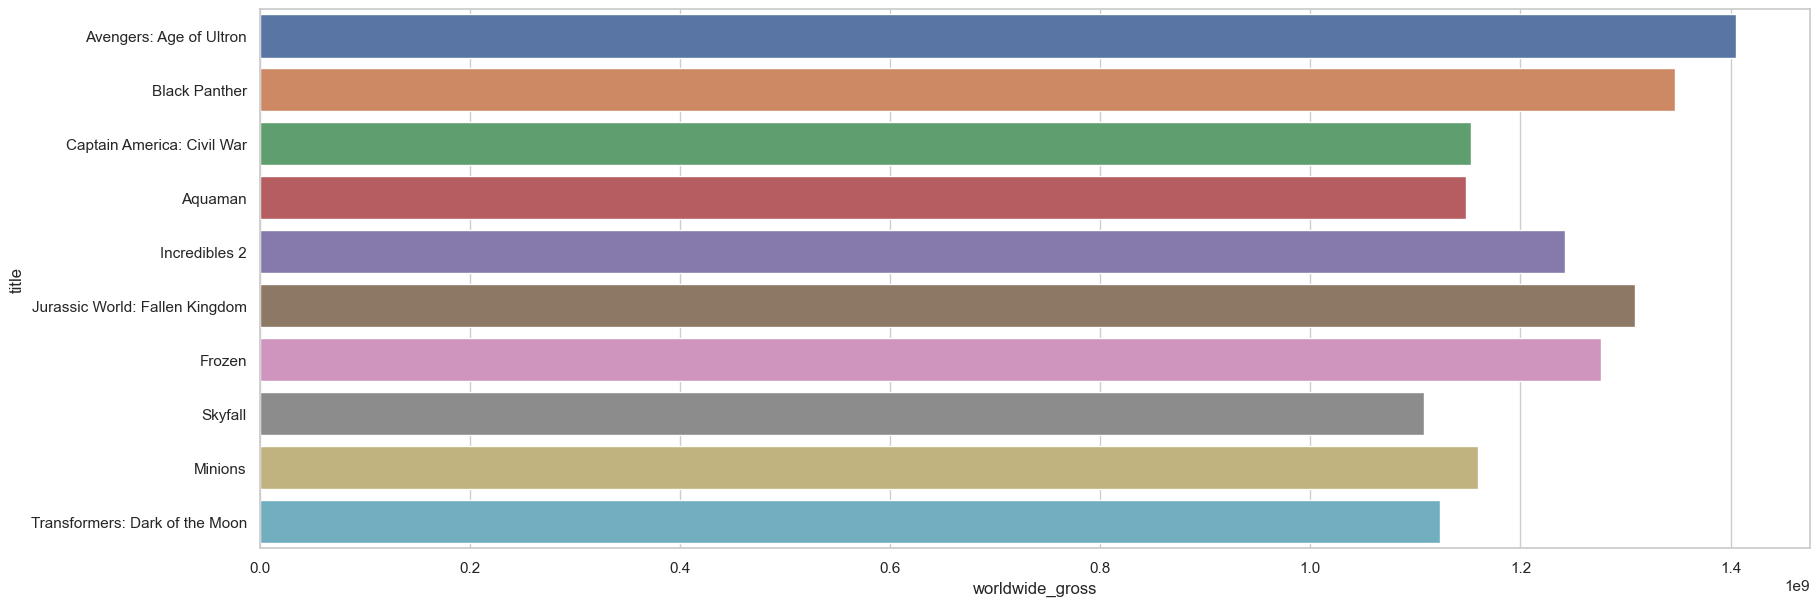

In [ ]:
#checking to see the top grossing films
fig, axes = plt.subplots(figsize=(20,7))
sns.barplot(y=top_movies_df['title'],x= top_movies_df['worldwide_gross'], ax=axes)

plt.show()

Avengers Age of ultron is the leading movie in terms of revenue comes second Black Panther followed by Jurassic World.

*Checking if the most popular movies are also the highest grossing ones.*

In [ ]:
top_movies_sort = top_movies_df.sort_values(by=["popularity"], ascending=False)
top_movies_df = top_movies_sort.head(10)

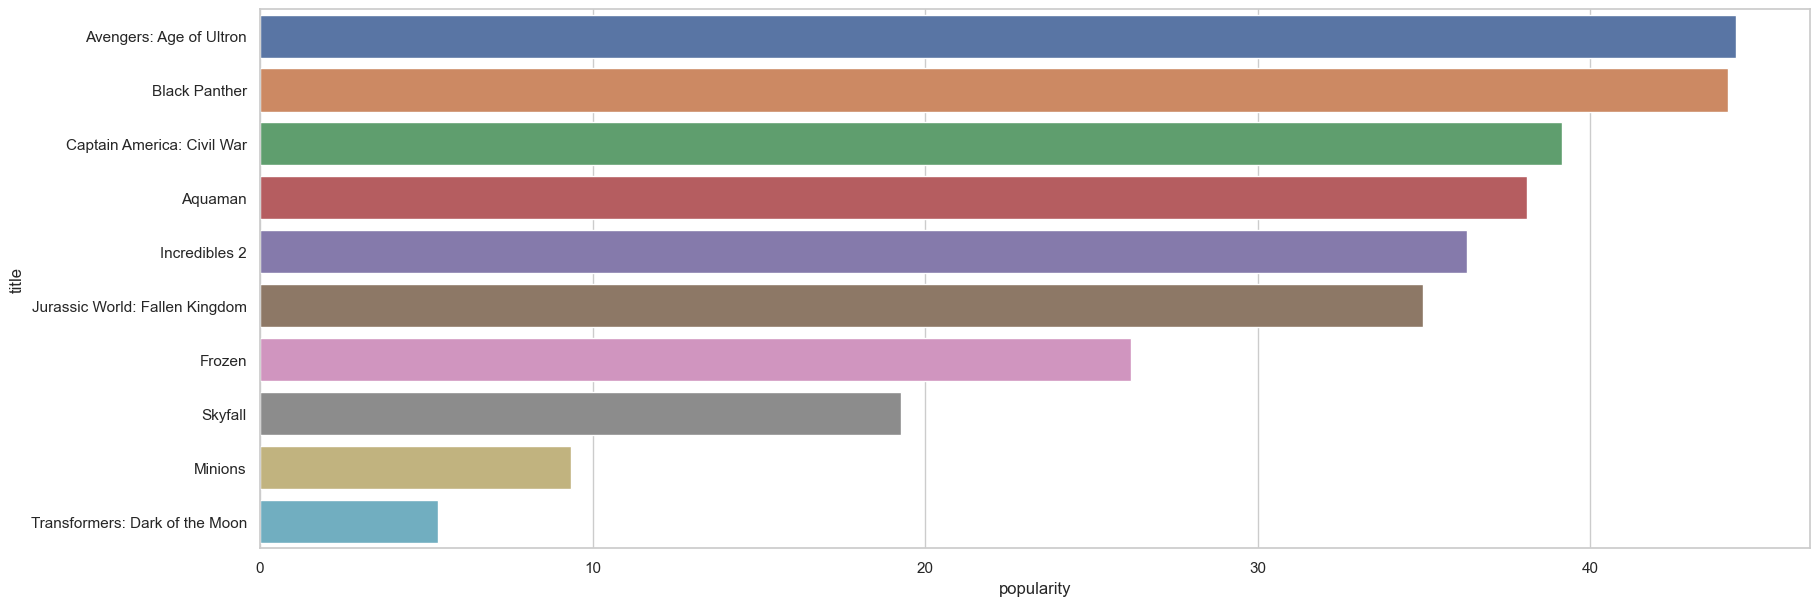

In [ ]:
#checking to see the top grossing films#
fig, axes = plt.subplots(figsize=(20,7))
sns.barplot(y=top_movies_df['title'],x=top_movies_df['popularity'], ax=axes)
plt.show()

Comparing popularity vs gross by movie, popularity does translate to sales meaning the more a  movie is popular, the more the sales. Avengers Age of Ultron was the highest grossing and also the most popular. The same goes for Black Panther.

Runtime of Movies vs their Popularity

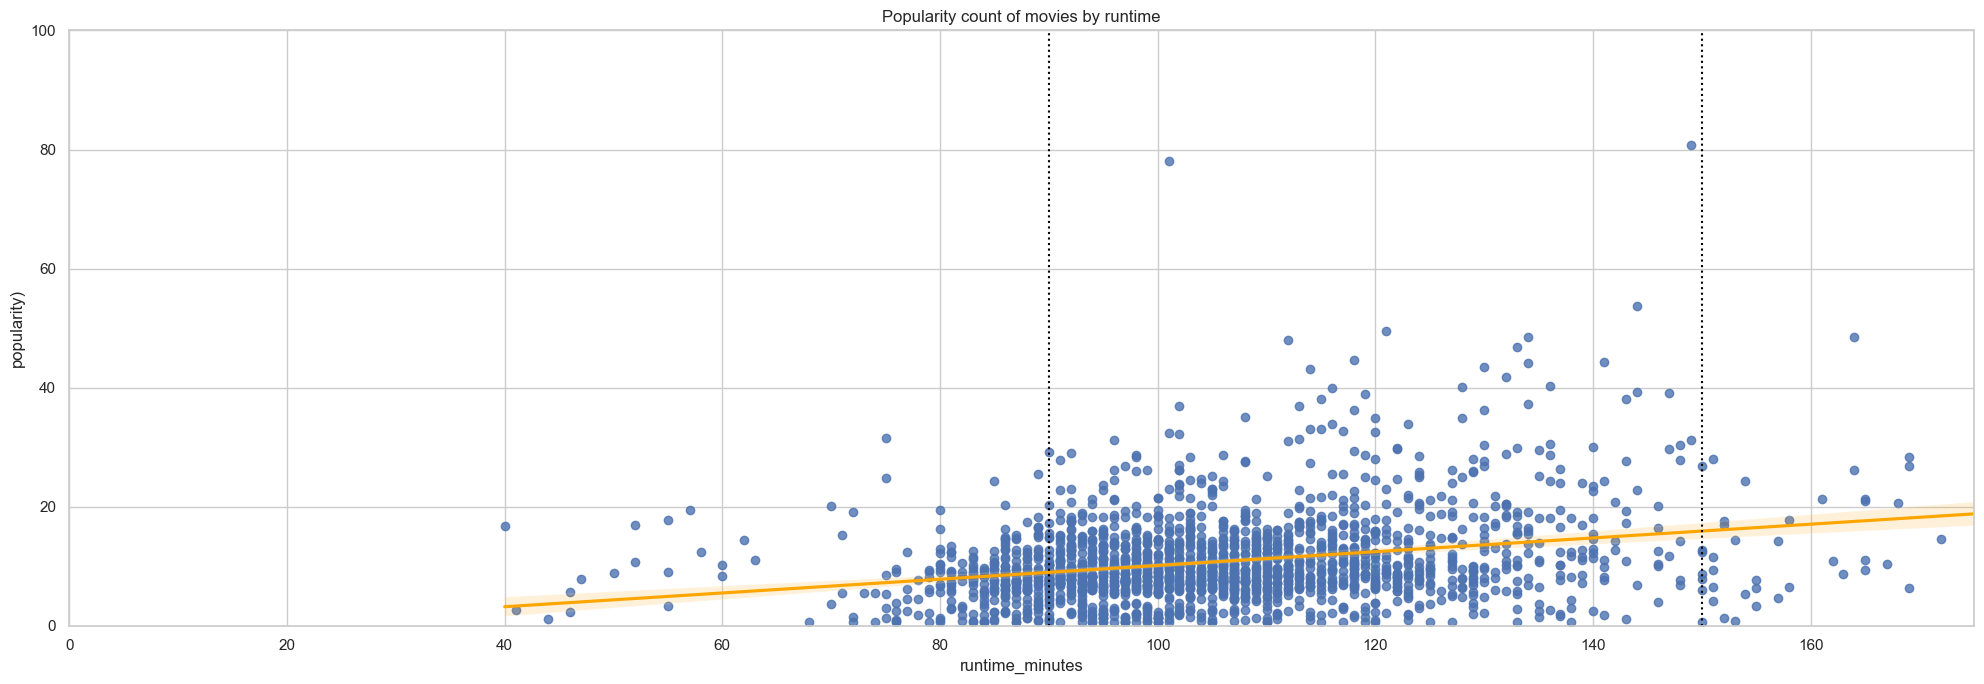

In [ ]:
#create a scatter plot to visualize the correlation between runtime_minutes and popularity
fig, ax = plt.subplots(figsize=(20,7))

sns.regplot(ax=ax, x='runtime_minutes', y='popularity', data= final_movie_dataset, line_kws={'color': 'orange'})
ax.set_xlabel('runtime_minutes')
ax.set_ylabel('popularity)')
ax.set_title('Popularity count of movies by runtime')
ax.set(xlim=(0,175))
ax.set(ylim=(0,100))
ax.axvline(90, color='black', ls=':')
ax.axvline(150, ls=':', color ='black')
plt.tight_layout()

There seems to be a positive correlation between popularity of a movie and its' runtime. 100 to 130 seems to be the ideal range.

**5. Studios**

* We are going to plot a barchart to visualize the relationship between directors and revenue for the films.

In [53]:
studios_df = final_movie_dataset.copy()
studios_df.head()

,tconst,title,original_title,runtime_minutes,genres,averagerating,studio,domestic_gross,foreign_gross,popularity,release_date,worldwide_gross
4,tt5647250,On the Road,On the Road,121.00000,Drama,5.70000,IFC,744000.00000,8000000.00000,8.91900,2012-12-21,8744000.00000
7,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,114.00000,Drama,7.30000,Fox,58200000.00000,129900000.00000,10.74300,2013-12-25,188100000.00000
10,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,114.00000,Drama,6.50000,Uni.,26300000.00000,26900000.00000,19.37300,2014-09-19,53200000.00000
13,tt0369610,Jurassic World,Jurassic World,124.00000,Sci-Fi,7.00000,Uni.,652300000.00000,0.00000,20.70900,2015-06-12,652300000.00000
25,tt3079380,Spy,Spy,119.00000,Crime,7.00000,Fox,110800000.00000,124800000.00000,12.54000,2015-06-05,235600000.00000


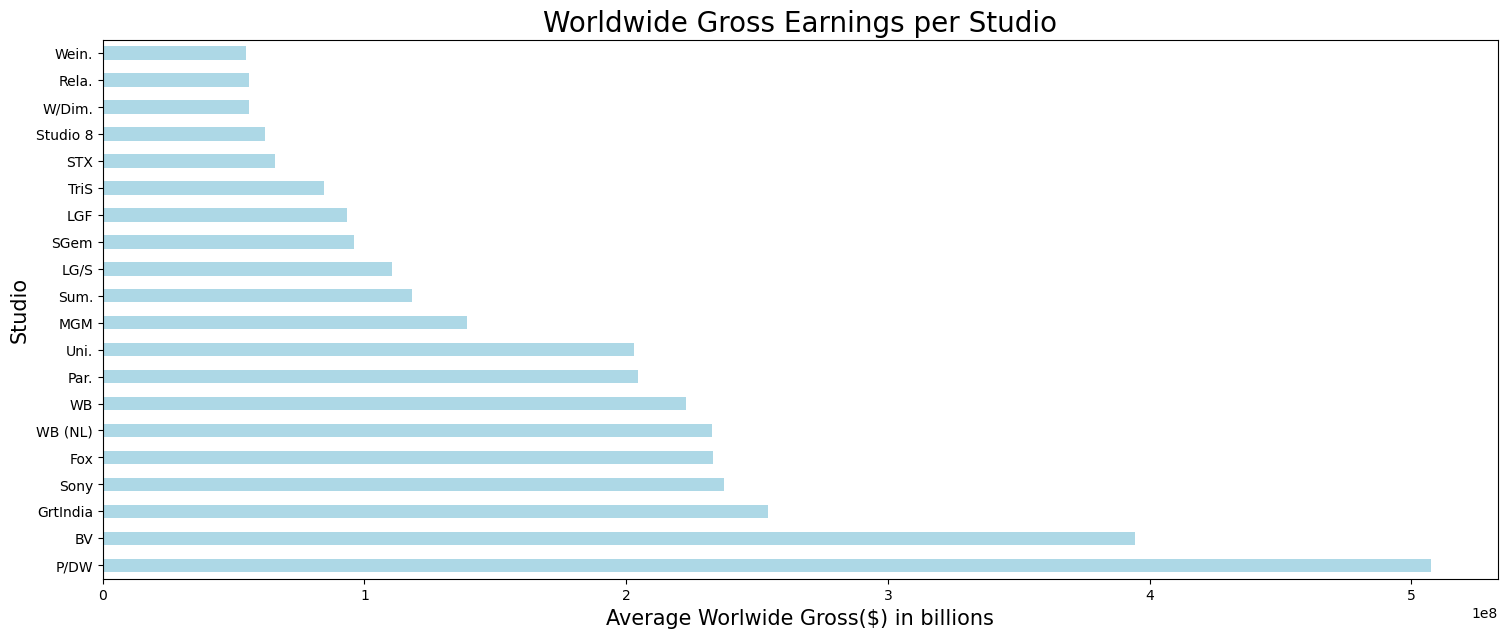

In [54]:
# Plot a bar chart that shows the total revenue generated per studio for the top 20 studios
fig, ax = plt.subplots(figsize=(18,7))

studios_df.groupby('studio')['worldwide_gross'].mean().sort_values(ascending=False)[:20].plot(kind='barh', color='lightblue')
ax.set_ylabel('Studio', fontsize=15)
ax.set_xlabel('Average Worlwide Gross($) in billions', fontsize=15)
ax.set_title('Worldwide Gross Earnings per Studio', fontsize=20);

The plot above shows that the top 5 studios are : P/DW , BV, Sony, WB(NL) and Fox respectively.

6. Directors

In [ ]:
director_analysis_df = final_movie_dataset.copy()
#Renaming the tconst column
director_analysis_df.rename(columns={'tconst': 'movie_id'}, inplace=True)
director_analysis_df

,movie_id,title,original_title,runtime_minutes,genres,averagerating,studio,domestic_gross,foreign_gross,popularity,release_date,worldwide_gross
4,tt5647250,On the Road,On the Road,121.00000,Drama,5.70000,IFC,744000.00000,8000000.00000,8.91900,2012-12-21,8744000.00000
7,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,114.00000,Drama,7.30000,Fox,58200000.00000,129900000.00000,10.74300,2013-12-25,188100000.00000
10,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,114.00000,Drama,6.50000,Uni.,26300000.00000,26900000.00000,19.37300,2014-09-19,53200000.00000
13,tt0369610,Jurassic World,Jurassic World,124.00000,Sci-Fi,7.00000,Uni.,652300000.00000,0.00000,20.70900,2015-06-12,652300000.00000
25,tt3079380,Spy,Spy,119.00000,Crime,7.00000,Fox,110800000.00000,124800000.00000,12.54000,2015-06-05,235600000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
6535,tt7668870,Searching,Searching,102.00000,Thriller,7.70000,SGem,26000000.00000,49400000.00000,23.66000,2018-08-24,75400000.00000
6537,tt7775622,Free Solo,Free Solo,100.00000,Sport,8.20000,NGE,17500000.00000,0.00000,11.47400,2018-08-31,17500000.00000
6540,tt7784604,Hereditary,Hereditary,127.00000,Mystery,7.30000,A24,44100000.00000,35300000.00000,26.18500,2018-06-08,79400000.00000
6543,tt7905466,They Shall Not Grow Old,They Shall Not Grow Old,99.00000,War,8.40000,WB,18000000.00000,0.00000,10.44100,2018-12-17,18000000.00000


In [ ]:
# Join the directors_df DataFrame to the directors_analysis DataFrame
director_analysis_df = director_analysis_df.join(directors_df.set_index('movie_id'), on='movie_id', how='left')

# Join the persons_df DataFrame to the director_analysis_df DataFrame  
director_analysis_df = director_analysis_df.join(persons_df.set_index('person_id'), on='person_id', how='inner')
director_analysis_df 

,movie_id,title,original_title,runtime_minutes,genres,averagerating,studio,domestic_gross,foreign_gross,popularity,release_date,worldwide_gross,person_id,primary_name,birth_year,death_year,primary_profession
4,tt5647250,On the Road,On the Road,121.00000,Drama,5.70000,IFC,744000.00000,8000000.00000,8.91900,2012-12-21,8744000.00000,nm0935863,Michael Winterbottom,1961.00000,NaN,"director,producer,writer"
402,tt0954947,The Killer Inside Me,The Killer Inside Me,109.00000,Horror,6.10000,IFC,217000.00000,3800000.00000,7.08700,2010-04-27,4017000.00000,nm0935863,Michael Winterbottom,1961.00000,NaN,"director,producer,writer"
402,tt0954947,The Killer Inside Me,The Killer Inside Me,109.00000,Horror,6.10000,IFC,217000.00000,3800000.00000,7.08700,2010-04-27,4017000.00000,nm0935863,Michael Winterbottom,1961.00000,NaN,"director,producer,writer"
3193,tt1836987,Trishna,Trishna,117.00000,Drama,6.00000,IFC,240000.00000,0.00000,2.87300,2012-07-12,240000.00000,nm0935863,Michael Winterbottom,1961.00000,NaN,"director,producer,writer"
3193,tt1836987,Trishna,Trishna,117.00000,Drama,6.00000,IFC,240000.00000,0.00000,2.87300,2012-07-12,240000.00000,nm0935863,Michael Winterbottom,1961.00000,NaN,"director,producer,writer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6535,tt7668870,Searching,Searching,102.00000,Thriller,7.70000,SGem,26000000.00000,49400000.00000,23.66000,2018-08-24,75400000.00000,nm3792134,Aneesh Chaganty,NaN,NaN,"writer,director,editor"
6535,tt7668870,Searching,Searching,102.00000,Thriller,7.70000,SGem,26000000.00000,49400000.00000,23.66000,2018-08-24,75400000.00000,nm3792134,Aneesh Chaganty,NaN,NaN,"writer,director,editor"
6537,tt7775622,Free Solo,Free Solo,100.00000,Sport,8.20000,NGE,17500000.00000,0.00000,11.47400,2018-08-31,17500000.00000,nm3011011,Jimmy Chin,NaN,NaN,"camera_department,director,producer"
6537,tt7775622,Free Solo,Free Solo,100.00000,Sport,8.20000,NGE,17500000.00000,0.00000,11.47400,2018-08-31,17500000.00000,nm1888091,Elizabeth Chai Vasarhelyi,NaN,NaN,"director,producer,writer"


In [ ]:

director_analysis_df.head()

,movie_id,title,original_title,runtime_minutes,genres,averagerating,studio,domestic_gross,foreign_gross,popularity,release_date,worldwide_gross,person_id,primary_name,birth_year,death_year,primary_profession
4,tt5647250,On the Road,On the Road,121.00000,Drama,5.70000,IFC,744000.00000,8000000.00000,8.91900,2012-12-21,8744000.00000,nm0935863,Michael Winterbottom,1961.00000,NaN,"director,producer,writer"
402,tt0954947,The Killer Inside Me,The Killer Inside Me,109.00000,Horror,6.10000,IFC,217000.00000,3800000.00000,7.08700,2010-04-27,4017000.00000,nm0935863,Michael Winterbottom,1961.00000,NaN,"director,producer,writer"
402,tt0954947,The Killer Inside Me,The Killer Inside Me,109.00000,Horror,6.10000,IFC,217000.00000,3800000.00000,7.08700,2010-04-27,4017000.00000,nm0935863,Michael Winterbottom,1961.00000,NaN,"director,producer,writer"
3193,tt1836987,Trishna,Trishna,117.00000,Drama,6.00000,IFC,240000.00000,0.00000,2.87300,2012-07-12,240000.00000,nm0935863,Michael Winterbottom,1961.00000,NaN,"director,producer,writer"
3193,tt1836987,Trishna,Trishna,117.00000,Drama,6.00000,IFC,240000.00000,0.00000,2.87300,2012-07-12,240000.00000,nm0935863,Michael Winterbottom,1961.00000,NaN,"director,producer,writer"


In [ ]:
# Directors with more than one film will give the 'person_id' column duplicates. 
director_ids = director_analysis_df[director_analysis_df.duplicated(subset='person_id')]['person_id'].unique()

# Update the 'director_analysis_df' DataFrame to only include directors with multiple films
director_analysis_df = director_analysis_df[director_analysis_df['person_id'].isin(director_ids)]
director_analysis_df

,movie_id,title,original_title,runtime_minutes,genres,averagerating,studio,domestic_gross,foreign_gross,popularity,release_date,worldwide_gross,person_id,primary_name,birth_year,death_year,primary_profession
4,tt5647250,On the Road,On the Road,121.00000,Drama,5.70000,IFC,744000.00000,8000000.00000,8.91900,2012-12-21,8744000.00000,nm0935863,Michael Winterbottom,1961.00000,NaN,"director,producer,writer"
402,tt0954947,The Killer Inside Me,The Killer Inside Me,109.00000,Horror,6.10000,IFC,217000.00000,3800000.00000,7.08700,2010-04-27,4017000.00000,nm0935863,Michael Winterbottom,1961.00000,NaN,"director,producer,writer"
402,tt0954947,The Killer Inside Me,The Killer Inside Me,109.00000,Horror,6.10000,IFC,217000.00000,3800000.00000,7.08700,2010-04-27,4017000.00000,nm0935863,Michael Winterbottom,1961.00000,NaN,"director,producer,writer"
3193,tt1836987,Trishna,Trishna,117.00000,Drama,6.00000,IFC,240000.00000,0.00000,2.87300,2012-07-12,240000.00000,nm0935863,Michael Winterbottom,1961.00000,NaN,"director,producer,writer"
3193,tt1836987,Trishna,Trishna,117.00000,Drama,6.00000,IFC,240000.00000,0.00000,2.87300,2012-07-12,240000.00000,nm0935863,Michael Winterbottom,1961.00000,NaN,"director,producer,writer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6516,tt7312940,Singularity,Singularity,92.00000,Drama,3.90000,VE,4200.00000,0.00000,7.65400,2017-11-24,4200.00000,nm4134911,Robert Kouba,1992.00000,NaN,"producer,writer,director"
6527,tt7388562,"Paul, Apostle of Christ","Paul, Apostle of Christ",108.00000,Drama,6.70000,Affirm,17600000.00000,5500000.00000,12.00500,2018-03-28,23100000.00000,nm1358366,Andrew Hyatt,1982.00000,NaN,"miscellaneous,director,writer"
6527,tt7388562,"Paul, Apostle of Christ","Paul, Apostle of Christ",108.00000,Drama,6.70000,Affirm,17600000.00000,5500000.00000,12.00500,2018-03-28,23100000.00000,nm1358366,Andrew Hyatt,1982.00000,NaN,"miscellaneous,director,writer"
6535,tt7668870,Searching,Searching,102.00000,Thriller,7.70000,SGem,26000000.00000,49400000.00000,23.66000,2018-08-24,75400000.00000,nm3792134,Aneesh Chaganty,NaN,NaN,"writer,director,editor"


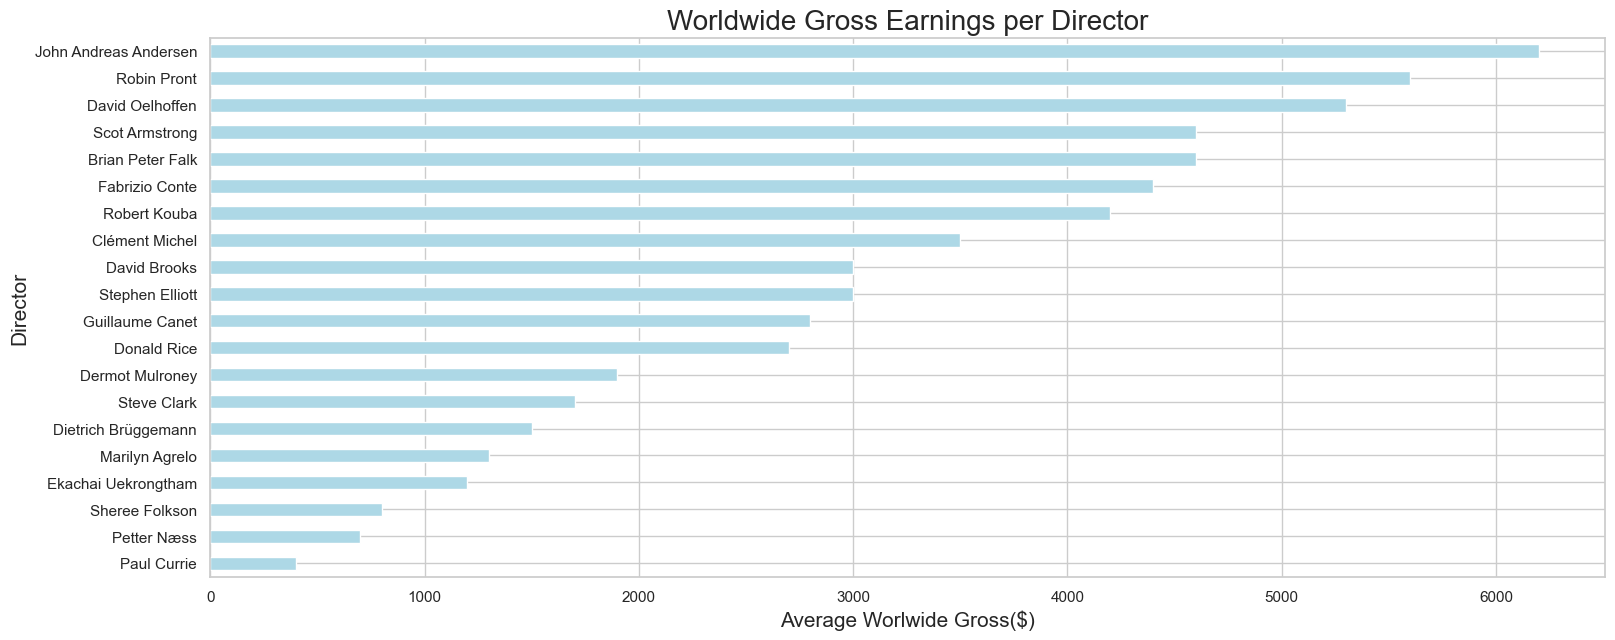

In [ ]:
# Plot a bar chart that shows the total revenue generated per director for the top 20 directors
fig, ax = plt.subplots(figsize=(18,7))

director_analysis_df.groupby('primary_name')['worldwide_gross'].mean().sort_values(ascending=True)[:20].plot(kind='barh', color='lightblue')
ax.set_ylabel('Director', fontsize=15)
ax.set_xlabel('Average Worlwide Gross($)', fontsize=15)
ax.set_title('Worldwide Gross Earnings per Director', fontsize=20);

From the above plot, we can see that the top five directors are : John Andreas Anderson, Robin Pront, David Delhoffen, Scott Armstrong and Brian Peter Falk.

# Conclusion

This analysis leads to the following recommendations for the types of films that are the best performing in the box office:

* 'SciFi' ,'Animation' and 'Comedy' genres are more likely to have a higher returns.

* Success of a film is not determinant on the films rating

* The length of a film (Runtime) of a film has impact on its box office performance. The ideal-time is between 90minutes-120 minutes.

* The best month to release a movie is November as it was the second most grossing and the second most in terms of number of releases. However, February seemed to have highest returns.

* Films directed by John Andreas Anderson, Robin Pront, David Delhoffen, Scott Armstrong and Brian Peter Falk produce the highest gross earnings.

* The best competitor studios in the business  are  P/DW , BV, Sony, WB(NL) and Fox respectively.

